In [59]:
!pip install matplotlib deap

In [60]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from deap import base,creator,tools,algorithms

In [95]:
num_locations=13
locations=[(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]
depot=(50,40)
num_vehicles=3

In [96]:
creator.create("FitnessMin",base.Fitness,weights=(-1.0,-1.0))
creator.create("Individual",list,fitness=creator.FitnessMin)

In [97]:
toolbox=base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [98]:
def evalVRP(individual):
  total_dis=0
  distances=[]
  for i in range(num_vehicles):
    vehicle_route=[depot]+[locations[individual[j]] for j in range(i,len(individual),num_vehicles)]+[depot]
    current_location = depot
    for k in range(len(vehicle_route) - 1):
      location = vehicle_route[k + 1]
      dis = np.sqrt((current_location[0] - location[0])**2 + (current_location[1] - location[1])**2)
      total_dis += dis
      distances.append(dis)
      current_location = location
  sd=np.std(distances)
  return total_dis,sd
toolbox.register("evaluate",evalVRP)

In [99]:
toolbox.register("mate",tools.cxPartialyMatched)
toolbox.register("mutate",tools.mutShuffleIndexes,indpb=0.05)
toolbox.register("select",tools.selRoulette)

In [100]:
def plot_routes(individual, title="Optimal Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	100   	411.921	11.4703
1  	80    	410.85 	11.7975
2  	74    	415.411	11.7975
3  	82    	419.03 	13.0191
4  	80    	416.2  	12.9155
5  	77    	426.014	12.4322
6  	73    	422.681	12.0925
7  	75    	417.645	13.713 
8  	80    	421.084	15.5363
9  	86    	418.441	14.7541
10 	73    	417.273	16.2202
11 	83    	412.69 	12.091 
12 	81    	413.127	12.091 
13 	83    	413.181	12.091 
14 	72    	410.862	12.091 
15 	81    	412.804	12.3851
16 	74    	415.729	12.3829
17 	85    	413.972	13.2103
18 	78    	417.431	12.23  
19 	76    	421.99 	13.7502
20 	73    	412.485	14.2731
21 	81    	417.794	12.0125
22 	82    	416.673	10.0471
23 	74    	418.644	13.5405
24 	83    	418.89 	11.3235
25 	75    	418.774	11.3235
26 	75    	419.401	11.3235
27 	78    	419.269	12.9857
28 	80    	422.537	13.5866
29 	68    	422.14 	15.0511
30 	83    	421.222	12.2949


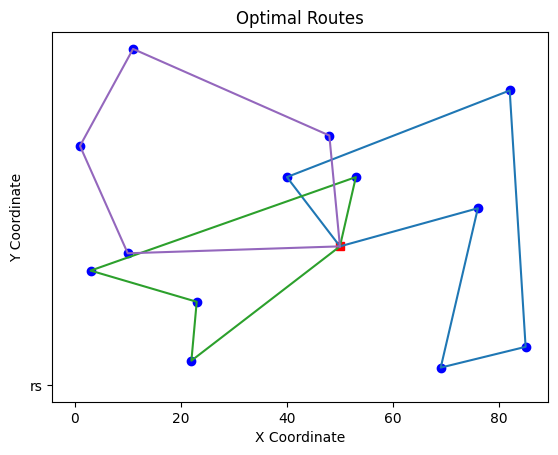

In [102]:
def main():
  random.seed(42)
  pop=toolbox.population(n=100)
  hof=tools.HallOfFame(1)
  stats=tools.Statistics(lambda ind:ind.fitness.values)
  stats.register("avg",np.mean)
  stats.register("min",np.min)
  algorithms.eaSimple(pop,toolbox,0.7,0.2,30,stats=stats,halloffame=hof)
  plot_routes(hof[0])
  return pop,stats,hof
if __name__=="__main__":
  main()